In [2]:
import pandas as pd

df = pd.read_csv('./datasets/Sonar.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
# 고정
tf.random.set_seed(3)
# X,y
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]
#모델
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# fit
history = model.fit(X,y, epochs=200, batch_size=5)
# result
print(f'Accuracy: {model.evaluate(X,y)[1]}')

Epoch 1/200
42/42 [==============================] - 2s 5ms/step - loss: 0.6921 - accuracy: 0.5096
Epoch 2/200
42/42 [==============================] - 0s 6ms/step - loss: 0.6686 - accuracy: 0.6058
Epoch 3/200
42/42 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.6394
Epoch 4/200
42/42 [==============================] - 0s 5ms/step - loss: 0.6201 - accuracy: 0.7019
Epoch 5/200
42/42 [==============================] - 0s 8ms/step - loss: 0.5899 - accuracy: 0.7308
Epoch 6/200
42/42 [==============================] - 0s 6ms/step - loss: 0.5655 - accuracy: 0.7260
Epoch 7/200
42/42 [==============================] - 0s 7ms/step - loss: 0.5300 - accuracy: 0.7788
Epoch 8/200
42/42 [==============================] - 1s 16ms/step - loss: 0.5008 - accuracy: 0.7596
Epoch 9/200
42/42 [==============================] - 0s 7ms/step - loss: 0.4851 - accuracy: 0.7885
Epoch 10/200
42/42 [==============================] - 0s 5ms/step - loss: 0.4614 - accuracy: 0.8029
Epoch 11

KeyboardInterrupt: 

In [16]:
result = history.history

In [26]:
result

{'loss': [0.6786630153656006,
  0.6572908163070679,
  0.6418377161026001,
  0.6210170388221741,
  0.5973927974700928,
  0.5791963934898376,
  0.5501459836959839,
  0.5219172239303589,
  0.5084238648414612,
  0.48312821984291077,
  0.47312381863594055,
  0.44765859842300415,
  0.4375212490558624,
  0.4280256927013397,
  0.41941335797309875,
  0.41778215765953064,
  0.40108662843704224,
  0.3978254497051239,
  0.39703840017318726,
  0.38467642664909363,
  0.375296413898468,
  0.37378838658332825,
  0.35916632413864136,
  0.3576893210411072,
  0.3546620011329651,
  0.34167078137397766,
  0.34631073474884033,
  0.33934324979782104,
  0.3319559693336487,
  0.3228967785835266,
  0.3155912756919861,
  0.33356335759162903,
  0.2976379692554474,
  0.3099733591079712,
  0.29239165782928467,
  0.2917526066303253,
  0.2834264039993286,
  0.2898707389831543,
  0.2687162160873413,
  0.2661121189594269,
  0.2706163227558136,
  0.2554616630077362,
  0.2679947316646576,
  0.2739011347293854,
  0.251802

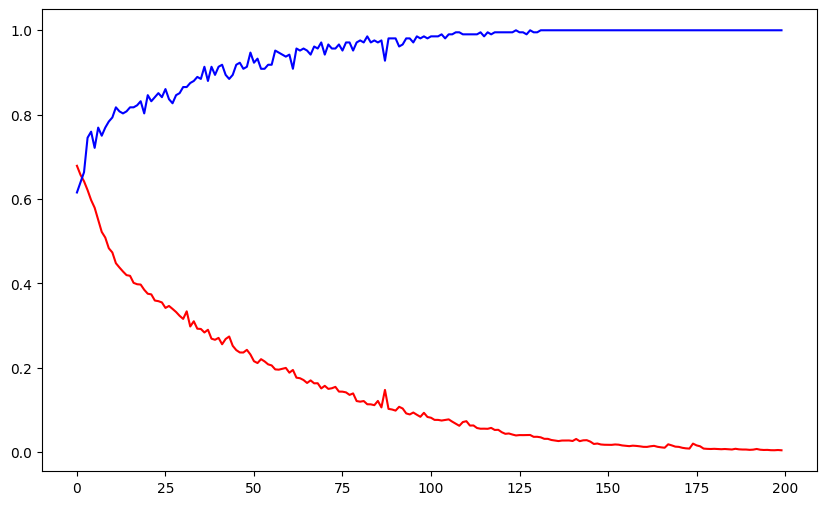

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(result['loss'] , c='red' , label='loss')
plt.plot(result['accuracy'] , c='blue' , label='accuracy')

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y ,test_size=0.3, random_state=42)

In [25]:
#모델
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# fit
history = model.fit(X_train,y_train, epochs=200, batch_size=5)
# result
print(f'Accuracy: {model.evaluate(X_test,y_test)[1]}')

Epoch 1/200
29/29 [==============================] - 2s 5ms/step - loss: 0.7046 - accuracy: 0.5103
Epoch 2/200
29/29 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5241
Epoch 3/200
29/29 [==============================] - 0s 6ms/step - loss: 0.6840 - accuracy: 0.5310
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.5448
Epoch 5/200
29/29 [==============================] - 0s 5ms/step - loss: 0.6660 - accuracy: 0.6000
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.5793
Epoch 7/200
29/29 [==============================] - 0s 6ms/step - loss: 0.6368 - accuracy: 0.7034
Epoch 8/200
29/29 [==============================] - 0s 4ms/step - loss: 0.6199 - accuracy: 0.7172
Epoch 9/200
29/29 [==============================] - 0s 6ms/step - loss: 0.6026 - accuracy: 0.7448
Epoch 10/200
29/29 [==============================] - 0s 6ms/step - loss: 0.5788 - accuracy: 0.6966
Epoch 11/

In [29]:
#모델
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# fit
history = model.fit(X_train,y_train, epochs=120, batch_size=5)

model.save('my_model.h5')

Epoch 1/120
29/29 [==============================] - 2s 6ms/step - loss: 0.6970 - accuracy: 0.5793
Epoch 2/120
29/29 [==============================] - 0s 6ms/step - loss: 0.6772 - accuracy: 0.6759
Epoch 3/120
29/29 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.7172
Epoch 4/120
29/29 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.7448
Epoch 5/120
29/29 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.7517
Epoch 6/120
29/29 [==============================] - 0s 3ms/step - loss: 0.6280 - accuracy: 0.7034
Epoch 7/120
29/29 [==============================] - 0s 3ms/step - loss: 0.6157 - accuracy: 0.7172
Epoch 8/120
29/29 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.7655
Epoch 9/120
29/29 [==============================] - 0s 4ms/step - loss: 0.5832 - accuracy: 0.7586
Epoch 10/120
29/29 [==============================] - 0s 3ms/step - loss: 0.5578 - accuracy: 0.7862
Epoch 11/

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')

In [34]:
model.evaluate(X_test , y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4559 - accuracy: 0.8413


[0.455891877412796, 0.841269850730896]

In [ ]:
from sklearn.model_selection import StratifiedKFold
tf.random.set_seed(3)
# X,y
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=10)
y[[0,1]]
accuracy = []
# skf.split(X, y)
for train, test in skf.split(X, y):
#     print(X[train])
	model = Sequential()
	model.add(Dense(24, input_dim=60, activation='relu'))
	model.add(Dense(10, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))

	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

	model.fit(X.iloc[train, :], y[train], epochs=100, batch_size=5)

	k_accuracy = "%.4f" % (model.evaluate(X.iloc[test, :], y[test])[1])
	accuracy.append(k_accuracy)

print("\n %.f fold accuracy: " % n_fold, accuracy)

Epoch 1/100
38/38 [==============================] - 2s 5ms/step - loss: 0.7018 - accuracy: 0.5348
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 0.6804 - accuracy: 0.5348
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6682 - accuracy: 0.5348
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6489 - accuracy: 0.6471
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.6297 - accuracy: 0.6845
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6018 - accuracy: 0.7433
Epoch 7/100
38/38 [==============================] - 0s 6ms/step - loss: 0.5769 - accuracy: 0.7380
Epoch 8/100
38/38 [==============================] - 0s 7ms/step - loss: 0.5517 - accuracy: 0.7754
Epoch 9/100
38/38 [==============================] - 0s 5ms/step - loss: 0.5271 - accuracy: 0.7540
Epoch 10/100
38/38 [==============================] - 0s 8ms/step - loss: 0.5030 - accuracy: 0.8128
Epoch 11/